In [15]:
from tools import *

# Synopsis
Dans cet atelier nous mettons en pratique les concepts vus ce mardi. Pour cela,
nous analysons une base de données publique fournissant une estimation des
émissions de carbonne chaque année (sur base de la consommation de carburants
fossiles et de la production de ciment) entre 1751 et 2014 [1].

Les données sont fournies sous forme de deux listes X et Y. La liste X contient
les années de mesures alors que la liste Y contient les émissions de carbonne,
exprimées en millions de tonnes. L'entrée en position i de la liste X correspond
à l'année des émissions de carbonne à la position i de la liste Y. Par exemple
si X[i] = 2000 et Y[i] = 6733, cela signifie que 6733 millions de tonnes de
carbonne ont été émises en l'an 2000.

La liste X est ordonnée en ordre strictement croissant telle que pour tout i
>= 0,
* si j > i et j < len(X) alors X[j] > X[i]
* si j = i et j < len(X) alors X[j] = X[i].

La combinaison de X et Y forment ce qu'on appelle courrement une série
temporelle [2].

Nous commençerons par afficher les données sous forme de graphique et à y
apporter quelques interpretations. Ensuite, nous modeliserons la tendance de
cette série temporelle par une fonction de croissance exponentielle et
utiliserons ce modèle pour fournir une analyse circonstanciée de l'évolution des
émissions de carbonne ces derniers siècles. Finalement, nous proposerons une
ébauche de validation de notre modèle et en nuancerons les conclusions.

# Chargement des données
Utilisons la fonction `loadData` pour charger la base de données en mémoire et
accéder à ces information via les listes X et Y. N'hésitez pas à regarder les
fichiers `tools.py` et `global.1751_2014.csv` pour comprendre comment il est
possible de stocker des informations et de les extraire de manière systématique.

Pour rendre notre code plus générique utilisons une constante contenant le nom
du ficher contenant les données brutes.

In [16]:
FICHIER_DONNEES_BRUTES = 'global.1751_2014.csv' # ficher de données à charger
X, Y = loadData(FICHIER_DONNEES_BRUTES)         # charger les données en mémoire

Les données qui composent notre série temporelle étant chargées en mémoire nous
pouvons les visualiser grâce à un graphe. Même si les données dont nous
disposons sont fondamentalement discrètes, il est d'usage de représenter les 
séries temporelles avec une ligne continue passant par tous les couples
(temps, valeur) issus de la base de donnée.

Nous allons utiliser la librairie `matplotlib` de Python [3]. Cette librairie
permet de représenter de manière graphique des jeux de données arbitraires. Plus
précisément nous allons utiliser la fonction `pyplot` de cette librairie [4].
Pour nous simplifier la tâche, nous l'avons déjà importée et pouvous l'appeler
n'importe où dans le code avec nom `plt`.

Pour ce labo

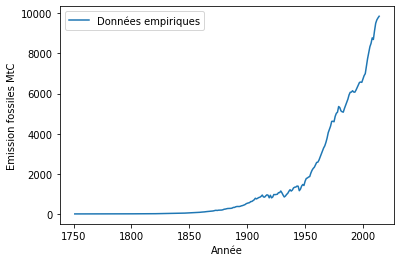

In [17]:
plt.plot(X, Y, label='Données empiriques')
plt.xlabel('Année')
plt.ylabel('Emission fossiles MtC')
plt.legend()

## Filtrer les données

Pour étudier l'évolution des émissions il est nécessaire de pouvoir analyser les
données mises à notre disposition sur une période de temps limitée.

In [18]:
def donneesPeriode(X, Y, debut, fin):
    """
    X: années du jeu de données
    Y: emission du jeu de données
    debut: date de début des données à extraire
    fin: date de fin des données à extraire
    """
    nb_mesures = fin - debut + 1                # nombre de mesures à extraire

    index_initial = debut - X[0]                # index de la première mesure
    index_final = index_initial + nb_mesures    # index de la dernière mesure

    X_ = X[index_initial:index_final]           # garder les x sur l'intervalle 
    Y_ = Y[index_initial:index_final]           # garder les y sur l'intervalle

    return X_, Y_                               # retourner les x et les y

# Representation des données de manière graphique

Commentez cette courbe en la plaçant dans son contexte histoirique

# Modélisation

## Modèle de croissance exponentielle
Le modèle exponentiel prend un taux de croissance et une valeur initiale.

La valeur au bout de _n_ itérations se calcule selon la formule générale _y_n = C^n * y_0_

Sur base d'un modèle de croissance exponentielle, trouver la valeur _y_ au bout de
 _n_ années depuis le début des mesures.

In [19]:
def modeleExponentiel(croissance, y0, n):
    """
    croissance: taux de croissance annuel exprimé en %
    y0: valeur initiale
    n: itération à laquelle prévoir la valeur
    """
    C = 1.0 + (croissance / 100.0)  # facteur de croissance

    yn = (C ** n) * y0              # valeur au bout de n années

    return yn                       # retourner la valeur après n années

## Estimation du taux de croissance annuelle
Estimation du taux de croissance annuel en supposant une evolution exponentielle
des émissions.

Utiliser un ajustement de courbe pour déterminer les paramètres du modèle de
croissance exponentielle.

In [20]:
def parametresModeleExponentiel(X, Y):
    """
    X: _x_ connus
    Y: _y_ connus
    """
    x0 = X[0]                       # première année de mesures
    y0 = Y[0]                       # valeur des émissions lors de cette année

    xn = X[len(X) - 1]              # dernière année de mesures
    yn = Y[len(X) - 1]              # valeur des émissions lors de cette année

    nb_annees = xn - x0             # nombre d'années de mesures

    C = (yn / y0)**(1.0/nb_annees)  # facteur de croissance
    
    croissance = (C - 1) * 100.0    # taux de croissance annuel en %

    return y0, croissance           # retourner la valeur initiale et le taux

Calculer le modèle sur un interval défini

In [21]:
def parametresModeleExponentielPeriode(X, Y, debut, fin):
    """
    X: données brutes
    Y: données brutes
    debut: date de debut de l'intervalle d'analyse
    fin: date de fin de l'intervalle d'analyse
    """
    X_, Y_ = donneesPeriode(X, Y, debut, fin)   # données sur l'intervalle

    # obtenir les parametres de l'exponentielle
    y0, croissance = parametresModeleExponentiel (X_, Y_) 

    # calculer toutes les émissions dans l'intervalle de temps grace au modèle
    # exponentiel
    Y_modele = [modeleExponentiel(croissance, y0, i) for i in range(len(X_))]
    
    return X_, Y_, Y_modele, croissance # retourner les données calculées

## Taux de croissance sur l'ensemble des données

### Calcul du taux de croissance sur différents intervalles de temps
1. l'entiereté des données
2. la période [1850, 1913]
3. la période [1945, 1973]

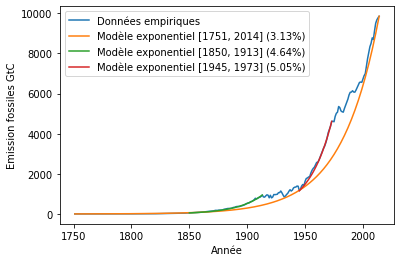

In [22]:
plt.plot(X, Y, label='Données empiriques')  # afficher les données sous forme de
                                            # graphe
plt.xlabel('Année')                         # nommer l'axe des x
plt.ylabel('Emission fossiles GtC')         # nommer l'axe des y

periodes = [
    (X[0], X[len(X)-1]),                    # l'entiereté des données
    (1850, 1913),                           # [1850, 1913]
    (1945, 1973)                            # [1945, 1973]
    ]                                       # lister les intervalles à étudier

croissances = dict()                        # taux de croissance calculés pour
                                            # chaque période
                                            #   clé = période
                                            #   valeur = taux de croissance

# représenter graphiquement les résultats pour tous les intervalles de temps et
# mémoriser le taux de croissance annuel
for debut, fin in periodes:
    # calculer les parametres du modèle sur l'intervalle de temps
    X_, Y_, Y_modele, croissance = parametresModeleExponentielPeriode(X, Y, debut, fin)

    # mémoriser le taux de croissance
    croissances[(debut, fin)] = croissance

    # ajouter la courbe à la figure
    plt.plot(X_, Y_modele,
             label='Modèle exponentiel [{debut}, {fin}] ({croissance:.2f}%)'
                    .format(debut=debut, fin=fin, croissance=croissance))

plt.legend()

# Quel est le temps de doublement?

Astuce:
* Produit: log(M * N) = log(M) + log(N)
* Quotient: log (M/N) = log(M) - log (N)
* Puissance: log(M^p) = p * log(M)
pour M > 0 et N > 0

In [23]:
def temps_doublement(croissance):
    C = 1.0 + (croissance / 100.0)      # facteur de croissance

    temps = log(2) / log (C)            # calcul du temps de doublement

    return temps                        # retourner le temps de doublement

In [24]:
doublements = dict()    # temps de doublement calculés pour chaque période
                        #   clé = période
                        #   valeur = temps de doublement

for (periode, value) in croissances.items():
    # calculer le temps de doublement (en années entières)
    temps = int(temps_doublement(croissances[periode]))

    # mémorier le temps de doublement
    doublements[periode] = temps

    # afficher le temps de doublement
    print ("Temps de doublement pour la période [{debut}, {fin}]: {temps} années"
          .format(debut=periode[0], fin=periode[1], temps = temps))

Temps de doublement pour la période [1751, 2014]: 22 années
Temps de doublement pour la période [1850, 1913]: 15 années
Temps de doublement pour la période [1945, 1973]: 14 années


## Validation des valeurs obtenues

### Analyse des émissions à un momment donné

Comparaison avec les données brutes

In [25]:
periode = periodes[0]               # période depuis le début des données
(debut, fin) = periode              # années de début et fin de la période

fin_periode_double = fin            # fin de la dernière période de doublement
debut_periode_double = fin - doublements[periode] # début de la dernière période
                                                  # de doublement

# obtention des données sur la dernière période de doublement
X_periode_double, Y_period_double = donneesPeriode(X, Y, debut_periode_double, fin_periode_double)

y_debut_periode = Y_period_double[0]                        # emissions au début
                                                            # de la période
y_fin_periode = Y_period_double[len(Y_period_double) - 1]   # émissions à la fin
                                                            # de la période

# afficher le rapport entre les émissions de la période 
print (y_fin_periode / y_debut_periode)

1.62142152023692


Comparaison avec le modèle

In [26]:
croissance = croissances[periode]   # récupérer le taux de croissance sur la
                                    # période

n_debut_periode_double = debut_periode_double - debut # nombre d'années écoulées
                                                      # entre le début des
                                                      # mesures et le début de
                                                      # la dernière période de
                                                      # doublement
n_fin_periode_double = fin_periode_double - debut     # nombre d'années écoulées
                                                      # entre le début des
                                                      # mesures et la fin de la
                                                      # dernière période de
                                                      # doublement

y_debut_periode_modele = modeleExponentiel(croissance, Y[0], n_debut_periode_double) # calculer la valeur de l'expontentielle au début de la dernière période de doublement
y_fin_periode_modele = modeleExponentiel(croissance, Y[0], n_fin_periode_double)     # calculer la valeur de l'expontentielle à la fin de la dernière période de doublement


# afficher le rapport entre les émission de la période
print (y_fin_periode_modele / y_debut_periode_modele)

1.9686062181974466


### Analyse des cumuls d'émissions

Comparaison avec les données brutes

In [27]:
emissions_periode_double = sum(Y_period_double)     # calculer la somme des
                                                    # émissions sur la dernière
                                                    # période de doublement

# obtention des données sur la période avant la période de doublement
X_avant, Y_avant = donneesPeriode(X, Y, debut, debut_periode_double - 1)

emissions_avant = sum(Y_avant)      # calculer la somme des émissions sur la
                                    # période avant la dernière période de
                                    # doublement

# afficher le rapport entre la somme des émissions de la dernière période
# d'émition et de la période la précédent
print (emissions_periode_double/emissions_avant)


0.7847874819664854


Comparaison avec le modèle

In [28]:
# calculer la somme des émissions anticipées par le modèle de croissance
# exponentiel sur la dernière période de doublement

emissions_periode_double = sum ([modeleExponentiel(croissance, Y_avant[0], n) for n in range(debut_periode_double - debut, fin_periode_double - debut)])

# calculer la somme des émissions anticipées par le modèle de croissance
# exponentiel sur la période avant la dernière période de doublement
emissions_avant = sum ([modeleExponentiel(croissance, Y_avant[0], n) for n in range(debut - debut, debut_periode_double - debut)])

# afficher le rapport entre la somme des émissions de la dernière période
# d'émition et de la période la précédent
print (emissions_periode_double / emissions_avant)

0.9691870241646819


### Comment pouvez-vous expliquez ces différences ?


# Aller plus loin
* Trouvez d'autres sources de données publiques et comparez les résultats
obtenus. Si les données que vous trouvez sont plus récentes, emettez des
prévisions d'émissions sur bases de nos données et comparez les aux observations
plus récentes.

# References
[1] Boden, T.A., G. Marland, and R.J. Andres. 2017. Global, Regional, and National Fossil-Fuel CO2 Emissions. Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, Oak Ridge, Tenn., U.S.A. doi 10.3334/CDIAC/00001_V2017.

[2] Louis, F. 2021. Daniel , peux-tu nous parler des séries temporelles ?, DataScientest, https://datascientest.com/series-temporelles.

[3] Matplotlib: Visualization with Python. 2022. https://matplotlib.org/.

[4] Pyplot function overview. 2022. https://matplotlib.org/stable/api/pyplot_summary.html.